# NLTK

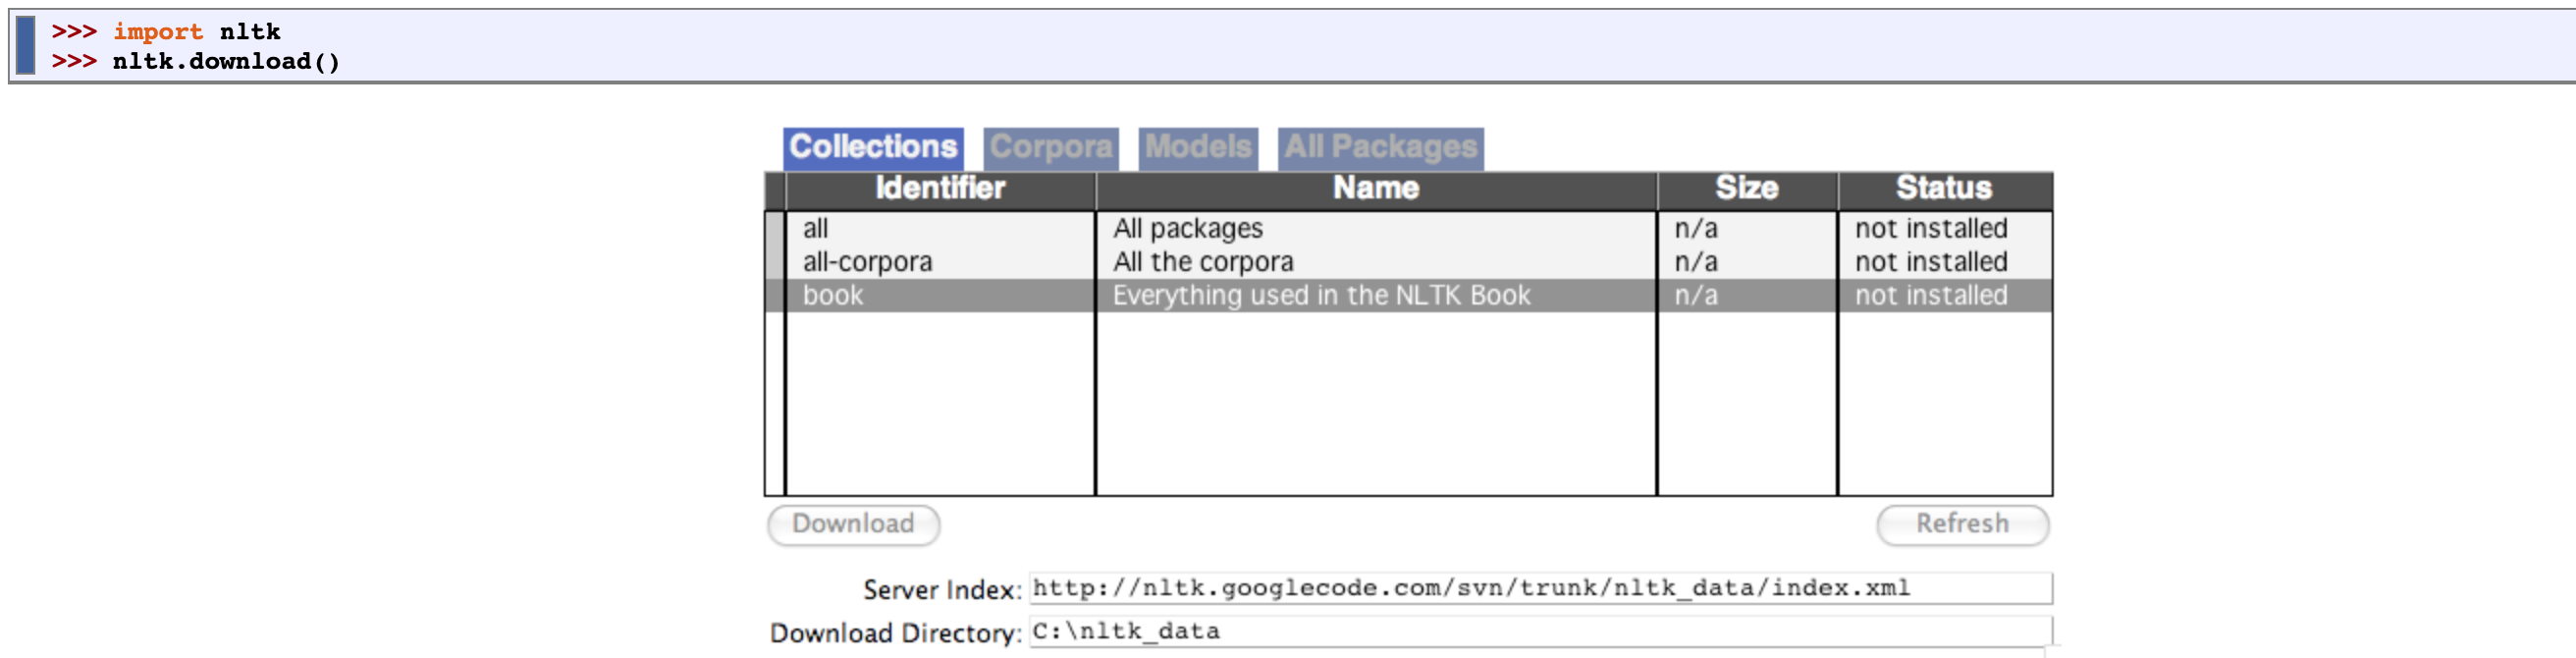

In [ ]:
import nltk
nltk.download('wordnet')

## Words similarity

In [ ]:
from nltk.corpus import wordnet
from typing import List

In [ ]:
color = wordnet.synset("red.n.01")
list(color.closure(lambda s: s.hypernyms()))

In [ ]:
word = wordnet.synset("door.n.01")
list(word.closure(lambda s: s.hypernyms()))

In [ ]:
def get_synonyms(word: str) -> List[str]:
    synonyms = [] 
  
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms.append(l.name()) 
    return synonyms

In [ ]:
get_synonyms("world")

In [ ]:
print(wordnet.synsets("world")[0].definition())

In [ ]:
print(wordnet.synsets("world")[0].examples())

In [ ]:
antonyms = []
for syn in wordnet.synsets("kind"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(f"{l.name()} - {l.antonyms()[0].name()}")
print(antonyms)

In [ ]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

In [ ]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
print(w1.wup_similarity(w2))

In [ ]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('cat.n.01')
print(w1.wup_similarity(w2))

In [ ]:
w1 = wordnet.synset('river.n.01')
w2 = wordnet.synset('cat.n.02')
print(w1.wup_similarity(w2))

## Tokenization and preprocessing

In [ ]:
import nltk

In [ ]:
text = """
Mrs. Elizabeth II (Elizabeth Alexandra Mary; born 21 April 1926)[a] is the Queen of the United Kingdom and the other Commonwealth realms.[b]

Elizabeth was born in Mayfair, London, the first child of the Duke and Duchess of York, later King George VI and Queen Elizabeth, and she was educated privately at home. Her father ascended the throne on the abdication of his brother King Edward VIII in 1936, from which time she was the heir presumptive. She began to undertake public duties during the Second World War, serving in the Auxiliary Territorial Service. In 1947, she married Philip, Duke of Edinburgh, a former prince of Greece and Denmark, with whom she has four children: Charles, Prince of Wales; Anne, Princess Royal; Prince Andrew, Duke of York; and Prince Edward, Earl of Wessex.

When her father died in February 1952, Elizabeth became head of the Commonwealth and queen regnant of seven independent Commonwealth countries: the United Kingdom, Canada, Australia, New Zealand, South Africa, Pakistan, and Ceylon. She has reigned as a constitutional monarch through major political changes, such as devolution in the United Kingdom, Canadian patriation, and the decolonisation of Africa. Between 1956 and 1992, the number of her realms varied as territories gained independence, and as realms, including South Africa, Pakistan, and Ceylon (renamed Sri Lanka), became republics. Her many historic visits and meetings include a state visit to the Republic of Ireland and visits to or from five popes. Significant events have included her coronation in 1953 and the celebrations of her Silver, Golden, and Diamond Jubilees in 1977, 2002, and 2012, respectively. In 2017, she became the first British monarch to reach a Sapphire Jubilee. She is the longest-lived and longest-reigning British monarch. She is the longest-serving female head of state in world history, and the world's oldest living monarch, longest-reigning current monarch, and oldest and longest-serving current head of state.

Elizabeth has occasionally faced republican sentiments and press criticism of the royal family, in particular after the breakdown of her children's marriages, her annus horribilis in 1992, and the death in 1997 of her former daughter-in-law Diana, Princess of Wales. However, in the United Kingdom, support for the monarchy has been and remains consistently high, as does her personal popularity.
"""

In [ ]:
len(text)

In [ ]:
tokens = text.split()

In [ ]:
tokens[:10]

In [ ]:
len(tokens)

In [ ]:
tokens_frequency = nltk.FreqDist(tokens)

In [ ]:
tokens_frequency.most_common()

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [ ]:
stop_words[150:160]

In [ ]:
cleaned_tokens = [token for token in tokens if token not in stop_words]

In [ ]:
cleaned_tokens_frequency = nltk.FreqDist(cleaned_tokens)
cleaned_tokens_frequency.most_common()

In [ ]:
len(set(cleaned_tokens))

In [ ]:
len(cleaned_tokens)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
sentences = sent_tokenize(text)

In [ ]:
word_tokens = word_tokenize(text)

In [ ]:
len(word_tokens)

In [ ]:
word_tokens = word_tokenize(text)
word_cleaned_tokens = [token for token in word_tokens if token not in stop_words]

In [ ]:
word_cleaned_tokens

In [ ]:
tokens_frequency

In [ ]:
word_cleaned_tokens_frequency = nltk.FreqDist(word_cleaned_tokens)
word_cleaned_tokens_frequency.most_common()

In [ ]:
len(set(word_cleaned_tokens))

### Stemming

Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.

There are many algorithms for stemming, but the most used algorithm is **Porter stemming algorithm**. There are some other stemming algorithms like **Lancaster stemming algorithm**. The output of this algorithm shows a bit different results for few words. You can try both of them to see the result.

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem("ate"))

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
russian_stemmer = SnowballStemmer("russian")

In [ ]:
russian_stemmer.stem("перезашел")

## Lematization

Word lemmatizing is similar to stemming, but the difference is the result of lemmatizing is a real word.

Unlike stemming, when you try to stem some words, it will result in something like this:

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('increases'))

Now, if we try to lemmatize the same word using NLTK WordNet, the result is correct:

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('worked'))

In [ ]:
word = "flyed"
print(f'Basic vebr form for {word}: {lemmatizer.lemmatize(word, pos="v")}')
print(f'Basic adjective form for {word}: {lemmatizer.lemmatize(word, pos="a")}')

Stemming works on words without knowing its context and that’s why stemming has lower accuracy and faster than lemmatization.

Word lemmatizing returns a real word even if it’s not the same word, it could be a synonym, but at least it’s a real word.

Sometimes you don’t care about this level of accuracy and all you need is speed, in this case, stemming is better.

In [ ]:
lemmatized_word_cleaned_tokens = [lemmatizer.lemmatize(token, pos="v") for token in word_cleaned_tokens]

In [ ]:
word_cleaned_tokens

In [ ]:
lemmatized_word_cleaned_tokens

In [ ]:
len(set(lemmatized_word_cleaned_tokens))

In [ ]:
stem_word_cleaned_tokens = [stemmer.stem(token) for token in word_cleaned_tokens]

In [ ]:
len(set(stem_word_cleaned_tokens))

In [ ]:
lemmatizer.lemmatize("his")

In [ ]:
"his" in stop_words

In [ ]:
stem_word_cleaned_tokens

# SpaCy

## Features

![spacy_features](images/spacy_features.png)

In [ ]:
import spacy

## Part-of-speech tags and dependencies 

In [ ]:
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

In [ ]:
from spacy import displacy

In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.serve(doc, style="dep")

## Named Entities 

In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

## Sentence boundary detection

In [ ]:
from spacy.pipeline import SentenceSegmenter

In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion. In August 2015, Google announced plans to reorganize its various interests as a conglomerate called Alphabet Inc.")

In [ ]:
for sentence in doc.sents:
    print(sentence)